In [1]:
from dotenv import load_dotenv
import sys
import os
from IPython.display import Image, display
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
load_dotenv(override=True)

True

In [ ]:
# Importowanie agenta
from agents_forge.agents_generation.generator import generate_agent_from_config
from agents_forge.agents_generation.state import AgentForgeState

In [9]:
agent = await generate_agent_from_config('example_config.json')

In [ ]:
display(Image(agent.get_graph().draw_mermaid_png()))

In [ ]:

result = await agent.ainvoke({"messages": [HumanMessage(content="")]})


In [ ]:
print(result['messages'][-1].content)

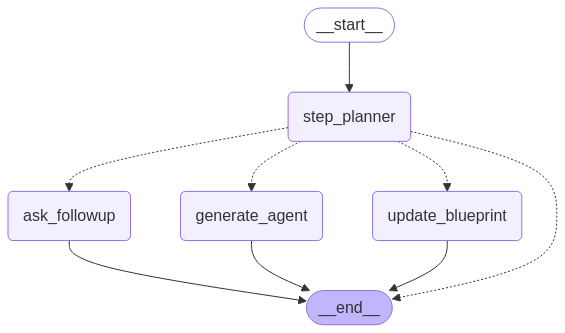

In [2]:


from agents_forge.core_agent.agent import generate_agent

agent = await generate_agent()

display(Image(agent.get_graph().draw_mermaid_png()))


In [3]:
config = {"configurable": {"thread_id": "1"}}

res = await agent.ainvoke(
    {
        "messages": 
            [HumanMessage(content="czesc, zbuduj agenta ktory bedzie robic research na temat AI na zadanych stronach www")]},
    config
    )

In [6]:
print(res["messages"][-1])

content='Cześć! Chciałbym zrozumieć lepiej, jakiego rodzaju research chciałbyś, aby agent przeprowadzał na stronach www dotyczących AI. Czy masz konkretne strony, które chciałbyś, aby agent zbadał? Jakie informacje są dla Ciebie najważniejsze (np. artykuły, badania, nowinki technologiczne)?' additional_kwargs={} response_metadata={} id='953e26cf-422d-410e-991c-a054f09dfd7d'


In [7]:
res = await agent.ainvoke({"messages": [HumanMessage(content="""
1. Chciałbym, aby agent przeszukiwał strony takie jak arXiv.org, MIT Technology Review, AI News, Google Scholar oraz blogi OpenAI i DeepMind.

2. Agent powinien zbierać najnowsze artykuły naukowe, informacje o przełomowych badaniach oraz nowinki technologiczne związane z rozwojem sztucznej inteligencji.

3. Preferuję format podsumowania z najważniejszymi punktami oraz linkami do oryginalnych źródeł, aby móc zagłębić się w interesujące tematy.

4. Badania powinny być przeprowadzane co tydzień, aby być na bieżąco z szybko rozwijającą się dziedziną AI.

5. Szczególnie interesują mnie zastosowania AI w medycynie, rozwój modeli wielomodalnych oraz postępy w obszarze uczenia przez wzmacnianie (reinforcement learning).
                                                     """)]}, config)

In [12]:
agent.get_state(config).values["agent_config"]

'Based on the messages provided, here is the updated agent blueprint:\n\n---\n\n**Agent Blueprint: AI Research Agent**\n\n**Purpose:**  \nTo conduct research on artificial intelligence (AI) by gathering and summarizing information from specified websites.\n\n**Functionality:**\n\n1. **Target Websites:**  \n   The agent will search and gather information from the following websites:\n   - arXiv.org\n   - MIT Technology Review\n   - AI News\n   - Google Scholar\n   - OpenAI blog\n   - DeepMind blog\n\n2. **Research Focus:**  \n   The agent will focus on collecting:\n   - The latest scientific articles\n   - Information on groundbreaking research\n   - Technological advancements related to AI\n\n3. **Output Format:**  \n   The agent will provide summaries that include:\n   - Key points from the gathered information\n   - Links to original sources for further exploration\n\n4. **Research Frequency:**  \n   The agent will conduct research on a weekly basis to ensure up-to-date information i